**INITIALIZATION:**

In [1]:
#@ IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

**IMPORTING DATASET:**

In [2]:
#@ IMPORTING DATASET:
PATH = "./housing.csv"
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
data = pd.read_csv(PATH, usecols=select_cols)

In [3]:
#@ INSPECTING DATAFRAME:
print(data.shape)

(20640, 10)


In [4]:
#@ INSPECTING DATAFRAME:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
#@ HANDLING MISSING VALUES:
median = data["total_bedrooms"].median()                                  # Calculating the median.
data["total_bedrooms"].fillna(median, inplace=True)                       # Imputing the median value.

**EXPLORATORY DATA ANALYSIS:**

In [6]:
#@ DATAFRAME INFORMATION:
data.describe(include=["O"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
#@ CALCULATING MODEL:
data['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

- Answer for Question1: '<1H OCEAN'

In [8]:
#@ PREPARING DATAFRAME:
data["rooms_per_household"] = data["total_rooms"]/data["households"]   # Rooms per Household.
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"] # Bedrooms per Room.
data["population_per_household"] = data["population"]/data["households"] # Populations per Household.
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [9]:
#@ INSPECTING DATASET:
data_numeric = data.copy()
data_numeric = data.drop(["ocean_proximity", "median_house_value"], axis=1)
data_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,2.824675,1243.333333


**COORELATION CALCULATION:**

In [10]:
#@ INSPECTING CORRELATION:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.326895,-0.545298,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,1.000000,-0.370308,-0.004852
bedrooms_per_room,0.081205,-0.098619,0.135622,-0.187381,0.071649,0.010035,0.034498,-0.545298,-0.370308,1.000000,0.002601


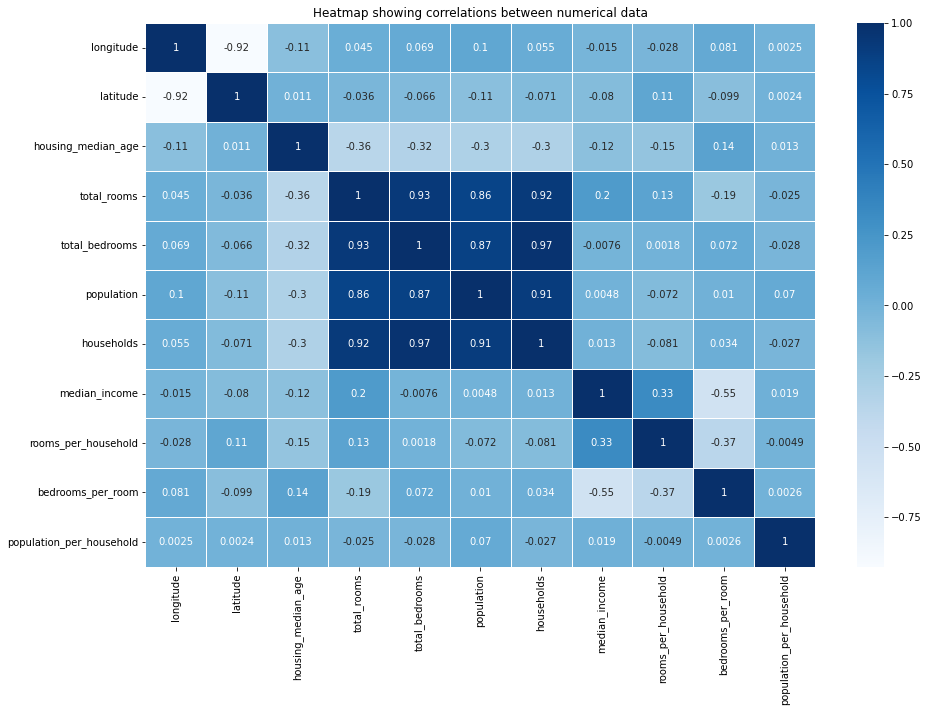

In [11]:
#@ INSPECTING HEATMAP:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [12]:
#@ INSPECTING CORRELATION:
data_numeric.corr().unstack().sort_values(ascending = False)[:15]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_bedrooms            total_rooms                 0.927058
total_rooms               total_bedrooms              0.927058
dtype: float64

- Answer for Question2: 'total_bedrooms' and 'households'. 

In [13]:
#@ PROCESSING DATASET:
data_class = data.copy()
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>=mean,1,0)

In [14]:
#@ PROCESSING DATASET:
data_class = data_class.drop('median_house_value', axis=1)

In [15]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [16]:
#@ PROCESSING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
#@ PROCESSING THE DATASET:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

**MUTUAL INFORMATION:**

In [18]:
#@ PREPARING DATASET:
cat = ['ocean_proximity']

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
ocean_proximity,0.101384


- Answer for Question3: 'ocean_proximity=0.101384'

In [19]:
#@ PREPARING THE DATASET:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

**CLASSIFICATION AND ACCURACY OF MODEL:**

In [20]:
#@ TRANSFORMING THE DATASET:
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", 
       "bedrooms_per_room", "population_per_household"]
train_dict = df_train[cat + num].to_dict(orient='records')

#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [21]:
#@ TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#@ INITIALIZING THE MODEL PREDICTION:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


- Answer for Question4: ~= 0.84

In [22]:
#@ INITIALIZING FEATURES:
features = cat + num
features

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

**FEATURE ELIMINATION:**

In [23]:
#@ INSPECTING THE DIFFERENCE IN ACCURACY:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.0204748062015504 0.8195251937984496
longitude 0.00642441860465115 0.8335755813953488
latitude 0.005939922480620141 0.8340600775193798
housing_median_age 0.010058139534883659 0.8299418604651163
total_rooms 0.0032751937984495383 0.8367248062015504
total_bedrooms 0.003517441860465098 0.8364825581395349
population 0.013691860465116279 0.8263081395348837
households 0.006908914728682158 0.8330910852713178
median_income 0.05463178294573645 0.7853682170542635
rooms_per_household 0.004001937984496107 0.8359980620155039
bedrooms_per_room 0.004970930232558124 0.8350290697674418
population_per_household 0.003517441860465098 0.8364825581395349


- Answer for Question5: smallest difference - `total rooms`.

In [24]:
#@ NORMALIZING THE DATA:
data['median_house_value']=np.log1p(data['median_house_value'])

In [35]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY,6.281853,0.172096,2.181467


In [26]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [27]:
#@ PREPARING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
#@ PREPARING THE DATASET:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [29]:
#@ DELETING DATASET:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

**RIDGE REGRESSION:**

In [30]:
#@ PREPARING THE DATASET:
train_dict = df_train[cat + num].to_dict(orient='records')

In [31]:
#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [32]:
#@ RIDGE REGRESSION IMPLEMENTATION:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

0 0.5241
0.01 0.5241
0.1 0.5241
1 0.5241
10 0.5241


- Answer for Question6: 0.